# Inicia el codigo

In [1]:
#Creado por Stephen Morales
#Ültima Actualización:14/11/2021
#Trabajo de Fin de Máster Universidad Internacional de la Rioja

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json 
import matplotlib.pyplot as plt
import text_analysis as ta
import statistics
from collections import Counter

# Análisis de Complejidad de Texto de los tweets de Rafael Correa

In [4]:
#Abre el archivo que contiene los tweets de Correa y lo almacena como un diccionario

a_file = open("tweetCorrea.json", "r")
tweets_Correa = json.load(a_file)

In [14]:
#Guarda los años
anios = []
for i in tweets_Correa.keys():
    anios.append(i.split("-")[1])
    
#Guarda los meses
mes = []
for i in tweets_Correa.keys():
    mes.append(i.split("-")[0])
    
#Guarda el numero de tweets en cada mes
n_tweets = []
for i in tweets_Correa.keys():
    n_tweets.append(len(tweets_Correa[i]))
    
#Guarda el tweet en el Data Frame
tweets = []
for i in tweets_Correa.keys():
    tweet=""
    for j in tweets_Correa[i]:
        tweet = tweet+j
    tweets.append(tweet)

#Realiza el promedio de conteo de palabras por tweet
promedio_palabras = []

for i in tweets_Correa.keys():
    conteo_palabras = []
    for j in tweets_Correa[i]:
        conteo_palabras.append(ta.contar_palabras(j))
    promedio_palabras.append(np.mean(conteo_palabras))
    
#guarda el mes, año y numero de tweets en un dataframe
correa_tweets_df = pd.DataFrame({"año":anios, "Número tweets":n_tweets,"Mes":mes,"Tweet":tweets, "Promedio_Palabras":promedio_palabras})

#Limpia el texto
correa_tweets_df["Tweets_Limpios"] = correa_tweets_df.Tweet.apply(lambda x: ta.limpieza_texto(x))

#Codificamos en números los meses
correa_tweets_df["N_mes"] = np.where(correa_tweets_df.Mes=="Ene",1,
                    np.where(correa_tweets_df.Mes=="Feb",2,
                    np.where(correa_tweets_df.Mes=="Mar",3,
                    np.where(correa_tweets_df.Mes=="Abr",4,
                    np.where(correa_tweets_df.Mes=="May",5,
                    np.where(correa_tweets_df.Mes=="Jun",6,
                    np.where(correa_tweets_df.Mes=="Jul",7,
                    np.where(correa_tweets_df.Mes=="Ago",8,
                    np.where(correa_tweets_df.Mes=="Sep",9,
                    np.where(correa_tweets_df.Mes=="Oct",10,
                    np.where(correa_tweets_df.Mes=="Nov",11,
                    np.where(correa_tweets_df.Mes=="Dic",12,np.nan))))))))))))

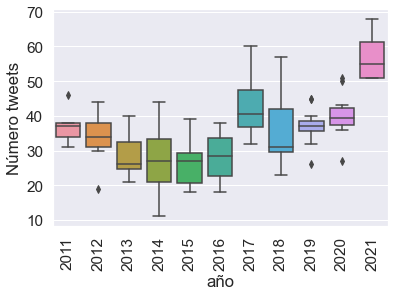

In [21]:
#Gráfico de cajas de los tweets de Correa por año
sns.set(font_scale = 1.4)
ax = sns.boxplot(data = correa_tweets_df, x='año',y=('Número tweets'))
for item in ax.get_xticklabels():
    item.set_rotation(90)

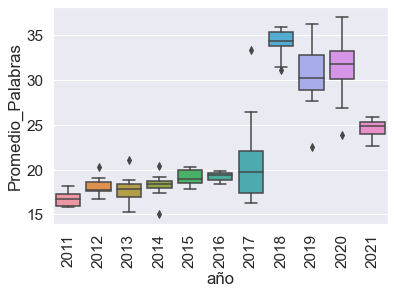

In [22]:
#Gráfico de cajas de los tweets de Correa por año
sns.set(font_scale = 1.4)
ax = sns.boxplot(data = correa_tweets_df, x='año',y=('Promedio_Palabras'))
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [6]:
correa_tweets_df

,año,Número tweets,Mes,Tweet,Promedio_Palabras,Tweets_Limpios,N_mes
0,2011,34,Ago,Ya en Carondelet para continuar trabajando por...,18.176471,carondelet continuar trabajando patria nueva l...,8.0
1,2011,37,Sep,Se ratifica la sentencia! Ganamos!Acabó por f...,16.729730,ratifica sentencia ganamos acabo chucky penosa...,9.0
2,2011,38,Oct,Saliendo de Guayaquil hacia Quito. Lo que se h...,17.289474,saliendo guayaquil quito hosp gquil impresiona...,10.0
3,2011,46,Nov,Saludos a todos. Felices vacaciones y aprovech...,15.782609,saludos felices vacaciones aprovechen conocer ...,11.0
4,2011,31,Dic,Gracias a todo el bloque PAIS por su firme apo...,15.935484,gracias bloque pais firme apoyo cosas personal...,12.0
...,...,...,...,...,...,...,...
112,2020,51,Dic,Estoy en Venezuela como observador electoral. ...,26.921569,venezuela observador electoral visite vicepres...,12.0
113,2021,51,Ene,"Venceremos! TODO, TODITO 1Estos son los honora...",24.490196,venceremos todito honorables miembros comite d...,1.0
114,2021,51,Feb,"¡Vamos a vencer! TODO, TODITO 1¡La Revolución ...",25.176471,vamos vencer todito revolucion ciudadana arras...,2.0
115,2021,59,Mar,¡Qué barbaridad! Parece desfile de la Policía ...,22.644068,barbaridad parece desfile policia nacionalaqui...,3.0


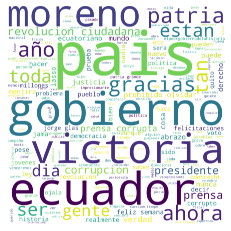

In [24]:
#Nube de Palabras de todo los tweets de Correa
tweet_Palabras = ""
for i in correa_tweets_df.Tweets_Limpios:
    tweet_Palabras+=i
ta.nube_palabras(tweet_Palabras)

Text(0, 0.5, 'Número de Tweets')

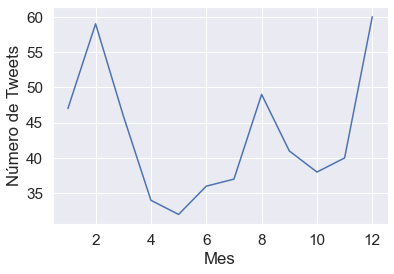

In [26]:
#Gráfica del número de tweets en el 2019
plt.plot(correa_tweets_df[correa_tweets_df.año=="2017"].N_mes,correa_tweets_df[correa_tweets_df.año=="2017"]["Número tweets"] )
plt.xlabel('Mes')
plt.ylabel('Número de Tweets')

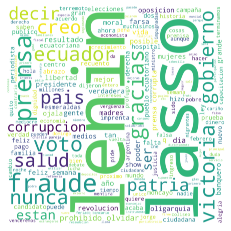

In [87]:
#Nube de Palabras en el primer grupo de meses del 2017
tweets_2017_1 = ""
for i in correa_tweets_df[(correa_tweets_df.año=="2017")].iloc[:5].Tweets_Limpios:
    tweets_2017_1+=i
ta.nube_palabras(tweets_2017_1)

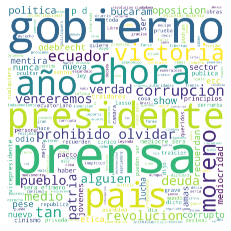

In [94]:
#Nube de Palabras en el segundo grupo de meses del 2017
tweets_2017_2 = ""
for i in correa_tweets_df[(correa_tweets_df.año=="2017")].iloc[5:10].Tweets_Limpios:
    tweets_2017_2+=i
ta.nube_palabras(tweets_2017_2)

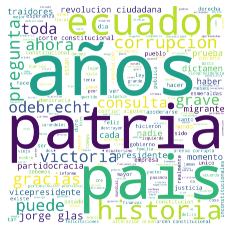

In [95]:
#Nube de Palabras en el tercer grupo de meses del 2017
tweets_2017_2 = ""
for i in correa_tweets_df[(correa_tweets_df.año=="2017")].iloc[10:].Tweets_Limpios:
    tweets_2017_2+=i
ta.nube_palabras(tweets_2017_2)

### Palabras y N gramas más usados

In [27]:
#Top palabras más usadas por año
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    top1 = Counter(tweet_año.split(" ")).most_common()[0][0]
    top2 = Counter(tweet_año.split(" ")).most_common()[1][0]
    top3 = Counter(tweet_año.split(" ")).most_common()[2][0]
    top4 = Counter(tweet_año.split(" ")).most_common()[3][0]
    top5 = Counter(tweet_año.split(" ")).most_common()[4][0]
    print(i, " ", top1, " ", top2, " ", top3, " ", top4, " ", top5)

2011   favor   pais   prensa   ser   dia
2012   prensa   revolucion   ser   semana   gracias
2013   patria   semana   abrazo   feliz   gracias
2014   gracias   abrazo   feliz   pais   semana
2015   victoria   ecuador   pais   patria   años
2016   patria   victoria   pais   semana   revolucion
2017   prensa   pais   victoria   ecuador   patria
2018   patria   prensa   gobierno   pais   moreno
2019   moreno   gobierno   patria   pais   corrupcion
2020   gobierno   patria   ecuador   moreno   elpeorgobiernodelahistoria
2021   lasso   moreno   andres   arauz   campaña


In [28]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in correa_tweets_df.Tweets_Limpios:
    tweet_Palabras+=i
    
for i in range(10):
    print(Counter(tweet_Palabras.split(" ")).most_common()[i][0],Counter(tweet_Palabras.split(" ")).most_common()[i][1])

patria 309
prensa 285
pais 284
ecuador 246
gobierno 241
moreno 210
victoria 206
revolucion 202
años 176
ser 174


In [29]:
#Bigramas más usados por Corre por año
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    top1 = Counter(ta.bigram(tweet_año)).most_common()[0][0]
    top2 = Counter(ta.bigram(tweet_año)).most_common()[1][0]
    top3 = Counter(ta.bigram(tweet_año)).most_common()[2][0]
    top4 = Counter(ta.bigram(tweet_año)).most_common()[3][0]
    top5 = Counter(ta.bigram(tweet_año)).most_common()[4][0]
    print(i, " ", top1, " ", top2, " ", top3, " ", top4, " ", top5)

2011   debe ser   favor atender   libertad expresion   tibanada dia   prensa corrupta
2012   prensa corrupta   feliz semana   revolucion ciudadana   libertad expresion   prohibido olvidar
2013   feliz semana   patria grande   grande avanza   iglesia pare   pare sufrir
2014   feliz semana   patria grande   prensa corrupta   revolucion ciudadana   pasado volveran
2015   feliz semana   patria grande   prensa corrupta   prohibido olvidar   muchisimos victoria
2016   prohibido olvidar   feliz semana   pueblo ecuatoriano   revolucion ciudadana   patria nueva
2017   prohibido olvidar   prensa corrupta   revolucion ciudadana   jorge glas   viejo pais
2018   revolucion ciudadana   prensa corrupta   jorge glas   prohibido olvidar   cuestion tiempo
2019   revolucion ciudadana   jorge glas   lenin moreno   cuestion tiempo   prohibido olvidar
2020   revolucion ciudadana   odio memoria   jorge glas   cuestion tiempo   tres años
2021   andres arauz   campaña sucia   lasso moreno   prensa corrupta   g

In [30]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in correa_tweets_df.Tweets_Limpios:
    tweet_Palabras+=i
    
for i in range(10):
    print(Counter(ta.bigram(tweet_Palabras)).most_common()[i][0],Counter(ta.bigram(tweet_Palabras)).most_common()[i][1])

revolucion ciudadana 113
prensa corrupta 99
prohibido olvidar 89
feliz semana 75
jorge glas 60
patria grande 55
cuestion tiempo 41
pueblo ecuatoriano 36
andres arauz 25
debe ser 23


In [31]:
# 3 gramas más usadas por Correa
tweet_Palabras = ""
for i in correa_tweets_df.Tweets_Limpios:
    tweet_Palabras+=i
    
for i in range(10):
    print(Counter(ta.three_gram(tweet_Palabras)).most_common()[i][0],Counter(ta.three_gram(tweet_Palabras)).most_common()[i][1])

prensa libre independiente 12
cuenta ina investment 10
voto mejor arma 8
años revolucion ciudadana 7
hola feliz semana 7
viva patria grande 6
señal patria grande 6
patria grande avanza 6
abrazo feliz semana 6
patria grande victoria 6


In [32]:
#Cuenta la palabra "patria" por año
evolucion_patria = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_patria.append(tweet_año.count('patria'))
    

In [33]:
#Cuenta la palabra "patria" por año
evolucion_prensa = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_prensa.append(tweet_año.count('prensa'))
    

In [34]:
#Cuenta la palabra "pais" por año
evolucion_pais = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_pais.append(tweet_año.count('pais'))
    

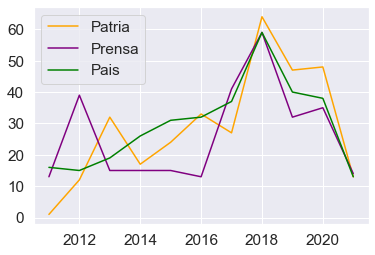

In [35]:
años = range(2011,2022)
plt.plot(años,evolucion_patria,"orange", label = "Patria")
plt.plot(años,evolucion_prensa,'purple', label="Prensa")
plt.plot(años,evolucion_pais,"green", label= "Pais")
plt.legend()

In [36]:
#Cuenta la palabra "moreno" por año
evolucion_moreno = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_moreno.append(tweet_año.count('moreno'))
    

In [37]:
#Cuenta la palabra "lenin" por año
evolucion_lenin = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_lenin.append(tweet_año.count('lenin'))
    

In [38]:
#Cuenta la palabra "lasso" por año
evolucion_lasso = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_lasso.append(tweet_año.count('lasso'))
    

In [39]:
#Cuenta la palabra "andres" por año
evolucion_andres = []
for i in correa_tweets_df.año.unique():
    tweet_año = ""
    for j in correa_tweets_df[correa_tweets_df.año==i].Tweets_Limpios:
        tweet_año = tweet_año+j
    evolucion_andres.append(tweet_año.count('andres'))
    

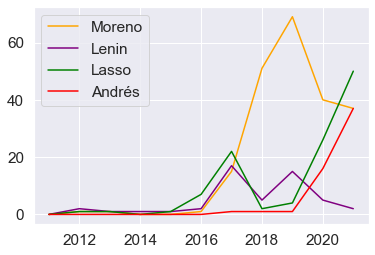

In [40]:
años = range(2011,2022)
plt.plot(años,evolucion_moreno,"orange", label = "Moreno")
plt.plot(años,evolucion_lenin,'purple', label="Lenin")
plt.plot(años,evolucion_lasso,"green", label= "Lasso")
plt.plot(años,evolucion_andres,"red", label= "Andrés")
plt.legend()

### Comparación con Tweets de Lenín Moreno

In [7]:
#Abre el documento JSON que contiene los tweets de Lenin Moreno de Octubre 2016 a Septiembre 2017
a_file = open("tweetLenin.json", "r")
tweets_Lenin = json.load(a_file)

#Guarda los años
anios = []
for i in tweets_Lenin.keys():
    anios.append(i.split("-")[1])
    
#Guarda los meses
mes = []
for i in tweets_Lenin.keys():
    mes.append(i.split("-")[0])
    
#Guarda el numero de tweets en cada mes
n_tweets = []
for i in tweets_Lenin.keys():
    n_tweets.append(len(tweets_Lenin[i]))
    
#Guarda el tweet en el Data Frame
tweets = []
for i in tweets_Lenin.keys():
    tweet=""
    for j in tweets_Lenin[i]:
        tweet = tweet+j
    tweets.append(tweet)

#Realiza el promedio de conteo de palabras por tweet
promedio_palabras = []

for i in tweets_Lenin.keys():
    conteo_palabras = []
    for j in tweets_Lenin[i]:
        conteo_palabras.append(ta.contar_palabras(j))
    promedio_palabras.append(np.mean(conteo_palabras))
    
#guarda el mes, año y numero de tweets en un dataframe
lenin_tweets_df = pd.DataFrame({"año":anios, "Número tweets":n_tweets,"Mes":mes,"Tweet":tweets, "Promedio_Palabras":promedio_palabras})

#Limpia el texto
lenin_tweets_df["Tweets_Limpios"] = lenin_tweets_df.Tweet.apply(lambda x: ta.limpieza_texto(x))

#Codificamos en números los meses
lenin_tweets_df["N_mes"] = np.where(lenin_tweets_df.Mes=="Ene",1,
                    np.where(lenin_tweets_df.Mes=="Feb",2,
                    np.where(lenin_tweets_df.Mes=="Mar",3,
                    np.where(lenin_tweets_df.Mes=="Abr",4,
                    np.where(lenin_tweets_df.Mes=="May",5,
                    np.where(lenin_tweets_df.Mes=="Jun",6,
                    np.where(lenin_tweets_df.Mes=="Jul",7,
                    np.where(lenin_tweets_df.Mes=="Ago",8,
                    np.where(lenin_tweets_df.Mes=="Sep",9,
                    np.where(lenin_tweets_df.Mes=="Oct",10,
                    np.where(lenin_tweets_df.Mes=="Nov",11,
                    np.where(lenin_tweets_df.Mes=="Dic",12,np.nan))))))))))))

In [8]:
#Abre el documento JSON que contiene los tweets de Lenin Moreno de Octubre 2016 a Septiembre 2017
a_file = open("tweetLasso.json", "r")
tweets_Lasso = json.load(a_file)

#Guarda los años
anios = []
for i in tweets_Lasso.keys():
    anios.append(i.split("-")[1])
    
#Guarda los meses
mes = []
for i in tweets_Lasso.keys():
    mes.append(i.split("-")[0])
    
#Guarda el numero de tweets en cada mes
n_tweets = []
for i in tweets_Lasso.keys():
    n_tweets.append(len(tweets_Lasso[i]))
    
#Guarda el tweet en el Data Frame
tweets = []
for i in tweets_Lasso.keys():
    tweet=""
    for j in tweets_Lasso[i]:
        tweet = tweet+j
    tweets.append(tweet)

#Realiza el promedio de conteo de palabras por tweet
promedio_palabras = []

for i in tweets_Lasso.keys():
    conteo_palabras = []
    for j in tweets_Lasso[i]:
        conteo_palabras.append(ta.contar_palabras(j))
    promedio_palabras.append(np.mean(conteo_palabras))
    
#guarda el mes, año y numero de tweets en un dataframe
lasso_tweets_df = pd.DataFrame({"año":anios, "Número tweets":n_tweets,"Mes":mes,"Tweet":tweets, "Promedio_Palabras":promedio_palabras})

#Limpia el texto
lasso_tweets_df["Tweets_Limpios"] = lasso_tweets_df.Tweet.apply(lambda x: ta.limpieza_texto(x))

#Codificamos en números los meses
lasso_tweets_df["N_mes"] = np.where(lasso_tweets_df.Mes=="Ene",1,
                    np.where(lasso_tweets_df.Mes=="Feb",2,
                    np.where(lasso_tweets_df.Mes=="Mar",3,
                    np.where(lasso_tweets_df.Mes=="Abr",4,
                    np.where(lasso_tweets_df.Mes=="May",5,
                    np.where(lasso_tweets_df.Mes=="Jun",6,
                    np.where(lasso_tweets_df.Mes=="Jul",7,
                    np.where(lasso_tweets_df.Mes=="Ago",8,
                    np.where(lasso_tweets_df.Mes=="Sep",9,
                    np.where(lasso_tweets_df.Mes=="Oct",10,
                    np.where(lasso_tweets_df.Mes=="Nov",11,
                    np.where(lasso_tweets_df.Mes=="Dic",12,np.nan))))))))))))

In [9]:
#Abre el documento JSON que contiene los tweets de Lenin Moreno de Octubre 2016 a Septiembre 2017
a_file = open("tweetArauz.json", "r")
tweets_Arauz = json.load(a_file)

#Guarda los años
anios = []
for i in tweets_Arauz.keys():
    anios.append(i.split("-")[1])
    
#Guarda los meses
mes = []
for i in tweets_Arauz.keys():
    mes.append(i.split("-")[0])
    
#Guarda el numero de tweets en cada mes
n_tweets = []
for i in tweets_Arauz.keys():
    n_tweets.append(len(tweets_Arauz[i]))
    
#Guarda el tweet en el Data Frame
tweets = []
for i in tweets_Arauz.keys():
    tweet=""
    for j in tweets_Arauz[i]:
        tweet = tweet+j
    tweets.append(tweet)

#Realiza el promedio de conteo de palabras por tweet
promedio_palabras = []

for i in tweets_Arauz.keys():
    conteo_palabras = []
    for j in tweets_Arauz[i]:
        conteo_palabras.append(ta.contar_palabras(j))
    promedio_palabras.append(np.mean(conteo_palabras))
    
#guarda el mes, año y numero de tweets en un dataframe
arauz_tweets_df = pd.DataFrame({"año":anios, "Número tweets":n_tweets,"Mes":mes,"Tweet":tweets, "Promedio_Palabras":promedio_palabras})

#Limpia el texto
arauz_tweets_df["Tweets_Limpios"] = arauz_tweets_df.Tweet.apply(lambda x: ta.limpieza_texto(x))

#Codificamos en números los meses
arauz_tweets_df["N_mes"] = np.where(arauz_tweets_df.Mes=="Ene",1,
                    np.where(arauz_tweets_df.Mes=="Feb",2,
                    np.where(arauz_tweets_df.Mes=="Mar",3,
                    np.where(arauz_tweets_df.Mes=="Abr",4,
                    np.where(arauz_tweets_df.Mes=="May",5,
                    np.where(arauz_tweets_df.Mes=="Jun",6,
                    np.where(arauz_tweets_df.Mes=="Jul",7,
                    np.where(arauz_tweets_df.Mes=="Ago",8,
                    np.where(arauz_tweets_df.Mes=="Sep",9,
                    np.where(arauz_tweets_df.Mes=="Oct",10,
                    np.where(arauz_tweets_df.Mes=="Nov",11,
                    np.where(arauz_tweets_df.Mes=="Dic",12,np.nan))))))))))))

In [16]:
correa_tweets_df

,año,Número tweets,Mes,Tweet,Promedio_Palabras,Tweets_Limpios,N_mes
0,2011,34,Ago,Ya en Carondelet para continuar trabajando por...,18.176471,carondelet continuar trabajando patria nueva l...,8.0
1,2011,37,Sep,Se ratifica la sentencia! Ganamos!Acabó por f...,16.729730,ratifica sentencia ganamos acabo chucky penosa...,9.0
2,2011,38,Oct,Saliendo de Guayaquil hacia Quito. Lo que se h...,17.289474,saliendo guayaquil quito hosp gquil impresiona...,10.0
3,2011,46,Nov,Saludos a todos. Felices vacaciones y aprovech...,15.782609,saludos felices vacaciones aprovechen conocer ...,11.0
4,2011,31,Dic,Gracias a todo el bloque PAIS por su firme apo...,15.935484,gracias bloque pais firme apoyo cosas personal...,12.0
...,...,...,...,...,...,...,...
112,2020,51,Dic,Estoy en Venezuela como observador electoral. ...,26.921569,venezuela observador electoral visite vicepres...,12.0
113,2021,51,Ene,"Venceremos! TODO, TODITO 1Estos son los honora...",24.490196,venceremos todito honorables miembros comite d...,1.0
114,2021,51,Feb,"¡Vamos a vencer! TODO, TODITO 1¡La Revolución ...",25.176471,vamos vencer todito revolucion ciudadana arras...,2.0
115,2021,59,Mar,¡Qué barbaridad! Parece desfile de la Policía ...,22.644068,barbaridad parece desfile policia nacionalaqui...,3.0


In [17]:
lenin_tweets_df

,año,Número tweets,Mes,Tweet,Promedio_Palabras,Tweets_Limpios,N_mes
0,2016,14,Oct,No te pierdas la entrevista de esta noche. Aná...,16.928571,pierdas entrevista noche analisis reflexion po...,10.0
1,2016,31,Nov,"Lo haré con cariño, respeto, honestidad, solid...",18.709677,hare cariño respeto honestidad solidaridad amo...,11.0
2,2016,59,Dic,"Felicidades a Quito, la ciudad de la mitad del...",19.050847,felicidades quito ciudad mitad mundo llena tra...,12.0
3,2017,77,Ene,¡La unidad nos hará avanzar aún más! El futuro...,19.363636,unidad hara avanzar futuro detiene elfuturoesa...,1.0
4,2017,67,Feb,El Ecuador tiene 5 productos estrellas. El Oro...,19.522388,ecuador productos estrellas oro mejor cacao fi...,2.0
5,2017,68,Mar,Ahora viene lo mejor ¡Vamos a ganar con la ayu...,20.441176,ahora viene mejor vamos ganar ayuda infinito a...,3.0
6,2017,40,Abr,¡Viva el Ecuador! ¡Bienvenidos luchadores de l...,21.050000,viva ecuador bienvenidos luchadores paz vida e...,4.0
7,2017,17,May,Grandes seres humanos: Mons. Eugenio Arellano ...,20.823529,grandes seres humanos mons eugenio arellano mo...,5.0
8,2017,34,Jun,Tuve el gusto de almorzar con niños de todos l...,19.176471,gusto almorzar niños rincones pais gracias car...,6.0
9,2017,30,Jul,Síndrome de abstinencia:La clave es identifica...,18.700000,sindrome abstinencia clave identificar coincid...,7.0


In [18]:
lasso_tweets_df

,año,Número tweets,Mes,Tweet,Promedio_Palabras,Tweets_Limpios,N_mes
0,2020,73,Jul,En los primeros #100minutos llegaremos con una...,32.602740,primeros llegaremos reforma lista sistema educ...,7.0
1,2020,88,Ago,Votemos por quien deje el dinero en los bolsil...,33.045455,votemos deje dinero bolsillos familias ecuator...,8.0
2,2020,49,Sep,Un buen administrador invierte en el futuro de...,28.591837,buen administrador invierte futuro pais empiez...,9.0
3,2020,45,Oct,ALIANZA POR LA PROSPERIDAD Estamos unidos por...,33.044444,alianza prosperidad unidos cambio ecuador opor...,10.0
4,2020,55,Nov,"Esta lucha es por ti, por tu familia, por tu t...",31.763636,lucha familia trabajo futuro unidos capacidad ...,11.0
5,2020,63,Dic,"Con seguridad, habrá inversión y más empleo en...",33.412698,seguridad habra inversion empleo ecuador desaf...,12.0
6,2021,71,Ene,¡SIN CORRUPCIÓN E INEFICIENCIA!Rescataremos al...,29.577465,corrupcion ineficiencia rescataremos ecuador p...,1.0
7,2021,45,Feb,¡VOTA TODO 21-6 PARA LASSO PRESIDENTE!Tu voto ...,28.933333,vota lasso presidente voto cambiara historia e...,2.0
8,2021,46,Mar,Los ganaderos requieren atención y apoyo. Por ...,23.478261,ganaderos requieren atencion apoyo encontramos...,3.0
9,2021,43,Abr,"Necesitamos encontrarnos UNIDOS, respetando nu...",23.558140,necesitamos encontrarnos unidos respetando dif...,4.0


In [19]:
arauz_tweets_df

,año,Número tweets,Mes,Tweet,Promedio_Palabras,Tweets_Limpios,N_mes
0,2020,21,Jul,Con el intercambio de información bancaria se ...,29.904762,intercambio informacion bancaria descubrieron ...,7.0
1,2020,20,Ago,Cuando concluya la restructuración jurídica de...,28.850000,concluya restructuracion juridica bonos aprox ...,8.0
2,2020,21,Sep,ARecuperarElFuturo Mensaje a los jóvenes del ...,25.095238,arecuperarelfuturo mensaje jovenes ecuador ter...,9.0
3,2020,49,Oct,¡Viva el pueblo guerrero de Guayaquil! 200 año...,31.122449,viva pueblo guerrero guayaquil años valentia r...,10.0
4,2020,32,Nov,Gracias hermanos y hermanas de Bolivia por inv...,31.062500,gracias hermanos hermanas bolivia invitarme ca...,11.0
5,2020,27,Dic,¡Gracias a todas y todos los que estuvieron vi...,33.333333,gracias todas vigilantes movilizados gracias s...,12.0
6,2021,36,Ene,El banquero ha venido financiando su campaña c...,33.416667,banquero venido financiando campaña depositos ...,1.0
7,2021,73,Feb,"Venció el amor, la esperanza, el futuroCon la ...",33.246575,vencio amor esperanza futurocon bendicion abue...,2.0
8,2021,65,Mar,Jóvenes me han preguntado sobre crédito educat...,33.169231,jovenes preguntado credito educativo becas pla...,3.0
9,2021,42,Abr,En la central sindical del Parlamento Laboral ...,35.000000,central sindical parlamento laboral ecuatorian...,4.0


In [17]:
int(arauz_tweets_df.N_mes[0])

7

In [ ]:
np.where(arauz_tweets_df.N_mes)

In [32]:
numero_mes = [10,11,12]
fecha = []
for i in range(len(arauz_tweets_df.N_mes)):
    fecha_string = str((np.where(np.isin(arauz_tweets_df.N_mes[i],numero_mes),'01/'+str(int(arauz_tweets_df.N_mes[i]))+'/'+str(arauz_tweets_df.año[i]),'01/'+"0"+str(int(arauz_tweets_df.N_mes[i]))+'/'+str(arauz_tweets_df.año[i]))))
    fecha_obj = datetime.datetime.strptime(fecha_string, '%d/%m/%Y')
    fecha.append(fecha_obj)

In [42]:
df = pd.DataFrame({'fecha': fecha, 'rango': range(10)})

In [43]:
df

,fecha,rango
0,2020-07-01,0
1,2020-08-01,1
2,2020-09-01,2
3,2020-10-01,3
4,2020-11-01,4
5,2020-12-01,5
6,2021-01-01,6
7,2021-02-01,7
8,2021-03-01,8
9,2021-04-01,9


# Comparación Correa-Moreno

In [23]:
#Abre el archivo que contiene los tweets de Correa y lo almacena como un diccionario

a_file = open("tweetCorrea.json", "r")
tweets_Correa = json.load(a_file)

In [24]:
#Abre el documento JSON que contiene los tweets de Lenin Moreno de Octubre 2016 a Septiembre 2017
a_file = open("tweetLenin.json", "r")
tweets_Lenin = json.load(a_file)

In [25]:
df_Correa = ta.df_tweets(tweets_Correa)

In [26]:
df_Moreno = ta.df_tweets(tweets_Lenin)

In [32]:
df_Correa["Tweet_Limpios"] = df_Correa.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

In [33]:
df_Moreno["Tweet_Limpios"] = df_Moreno.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

In [34]:
df_Moreno2 = pd.DataFrame({"Fecha":df_Moreno.Fecha, "Tweet_Limpios_Moreno":df_Moreno.Tweet_Limpios,
             "N_Tweets_Moreno":df_Moreno["Número tweets"], "Promedio_Palabras_Moreno":df_Moreno.Promedio_Palabras })

In [35]:
df_Correa2 = pd.DataFrame({"Fecha":df_Correa.Fecha, "Tweet_Limpios_Correa":df_Correa.Tweet_Limpios,
             "N_Tweets_Correa":df_Correa["Número tweets"], "Promedio_Palabras_Correa":df_Correa.Promedio_Palabras })

In [37]:
df_Moreno_Correa = df_Moreno2.merge(df_Correa2, how='inner',left_on='Fecha', right_on='Fecha')

In [46]:
for i in range(len(df_Moreno_Correa)):
    print(df_Moreno_Correa.Fecha[i], ta.palabras_frecuentes(df_Moreno_Correa.Tweet_Limpios_Moreno[i], 3))

2016-10-01 00:00:00 {'pais': 3, 'ecuador': 3, 'trabajar': 3}
2016-11-01 00:00:00 {'compromiso': 5, 'trabajar': 4, 'nuevos': 4}
2016-12-01 00:00:00 {'cambio': 10, 'pais': 9, 'futuro': 9}
2017-01-01 00:00:00 {'futuro': 16, 'pais': 16, 'gracias': 10}
2017-02-01 00:00:00 {'vamos': 17, 'pais': 12, 'ecuador': 11}
2017-03-01 00:00:00 {'vamos': 27, 'gobierno': 10, 'ecuador': 9}
2017-04-01 00:00:00 {'ecuador': 12, 'gracias': 12, 'presidente': 10}
2017-05-01 00:00:00 {'ecuador': 6, 'patria': 5, 'presidente': 3}
2017-06-01 00:00:00 {'lucha': 8, 'corrupcion': 8, 'transparencia': 5}
2017-07-01 00:00:00 {'dialogo': 6, 'continua': 6, 'pais': 5}
2017-08-01 00:00:00 {'gracias': 6, 'corrupcion': 5, 'redes': 4}
2017-09-01 00:00:00 {'popular': 4, 'corrupcion': 4, 'dialogo': 4}


In [47]:
for i in range(len(df_Moreno_Correa)):
    print(df_Moreno_Correa.Fecha[i], ta.palabras_frecuentes(df_Moreno_Correa.Tweet_Limpios_Correa[i], 3))

2016-10-01 00:00:00 {'victoria': 8, 'ecuador': 4, 'patria': 4}
2016-11-01 00:00:00 {'semana': 4, 'victoria': 4, 'pais': 3}
2016-12-01 00:00:00 {'pasado': 4, 'navidad': 4, 'felicitaciones': 3}
2017-01-01 00:00:00 {'nunca': 4, 'gobierno': 4, 'poder': 3}
2017-02-01 00:00:00 {'lenin': 9, 'fraude': 6, 'moncayo': 4}
2017-03-01 00:00:00 {'prensa': 8, 'mujeres': 5, 'fraude': 4}
2017-04-01 00:00:00 {'lasso': 9, 'votos': 6, 'creo': 5}
2017-05-01 00:00:00 {'prensa': 4, 'feliz': 4, 'verdadera': 3}
2017-06-01 00:00:00 {'prensa': 4, 'patria': 4, 'venceremos': 4}
2017-07-01 00:00:00 {'deuda': 5, 'olvidar': 4, 'publica': 4}
2017-08-01 00:00:00 {'moreno': 8, 'ahora': 6, 'presidente': 6}
2017-09-01 00:00:00 {'presidente': 5, 'medios': 5, 'pueblo': 4}


In [44]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in df_Moreno_Correa.Tweet_Limpios_Moreno:
    tweet_Palabras+=i
ta.palabras_frecuentes(tweet_Palabras, 10)

{'vamos': 78,
 'pais': 69,
 'ecuador': 65,
 'gracias': 53,
 'futuro': 48,
 'juntos': 35,
 'gobierno': 33,
 'pueblo': 30,
 'sera': 29,
 'paz': 29}

In [45]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in df_Moreno_Correa.Tweet_Limpios_Correa:
    tweet_Palabras+=i
ta.palabras_frecuentes(tweet_Palabras, 10)

{'prensa': 39,
 'victoria': 32,
 'ecuador': 24,
 'pais': 24,
 'gobierno': 23,
 'prohibido': 23,
 'olvidar': 23,
 'patria': 22,
 'lasso': 20,
 'presidente': 19}

In [42]:
df_Moreno_Correa.drop(['Tweet_Limpios_Moreno', 'Tweet_Limpios_Correa'], axis=1).to_csv("Correa_Moreno_Complejidad.csv")

In [14]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in df_Correa.Tweet_Limpios:
    tweet_Palabras+=i

ta.palabras_frecuentes(tweet_Palabras, 10)
#for i in range(10):
#    print(Counter(tweet_Palabras.split(" ")).most_common()[i][0],Counter(tweet_Palabras.split(" ")).most_common()[i][1])

{'patria': 309,
 'prensa': 285,
 'pais': 284,
 'ecuador': 246,
 'gobierno': 241,
 'moreno': 210,
 'victoria': 206,
 'revolucion': 202,
 'años': 176,
 'ser': 174}

# Comparación Correa-Lasso-Arauz

In [3]:
#Abre el archivo que contiene los tweets de Correa y lo almacena como un diccionario

a_file = open("tweetCorrea.json", "r")
tweets_Correa = json.load(a_file)

#Abre el archivo que contiene los tweets de Arauz y lo almacena como un diccionario

a_file = open("tweetarauz.json", "r")
tweets_Arauz = json.load(a_file)

a_file = open("tweetLasso.json", "r")
tweets_Lasso = json.load(a_file)

In [4]:
df_Correa = ta.df_tweets(tweets_Correa)

df_Arauz = ta.df_tweets(tweets_Arauz)

df_Lasso = ta.df_tweets(tweets_Lasso)

In [5]:
df_Correa["Tweet_Limpios"] = df_Correa.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

df_Arauz["Tweet_Limpios"] = df_Arauz.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

df_Lasso["Tweet_Limpios"] = df_Lasso.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

In [6]:
df_Correa2 = pd.DataFrame({"Fecha":df_Correa.Fecha, "Tweet_Limpios_Correa":df_Correa.Tweet_Limpios,
             "N_Tweets_Correa":df_Correa["Número tweets"], "Promedio_Palabras_Correa":df_Correa.Promedio_Palabras })

df_Arauz2 = pd.DataFrame({"Fecha":df_Arauz.Fecha, "Tweet_Limpios_Arauz":df_Arauz.Tweet_Limpios,
             "N_Tweets_Arauz":df_Arauz["Número tweets"], "Promedio_Palabras_Arauz":df_Arauz.Promedio_Palabras })

df_Lasso2 = pd.DataFrame({"Fecha":df_Lasso.Fecha, "Tweet_Limpios_Lasso":df_Lasso.Tweet_Limpios,
             "N_Tweets_Lasso":df_Lasso["Número tweets"], "Promedio_Palabras_Lasso":df_Lasso.Promedio_Palabras })

In [7]:
df_Arauz_Correa = df_Arauz2.merge(df_Correa2, how='inner',left_on='Fecha', right_on='Fecha')

In [8]:
df_Arauz_Correa_Lasso = df_Lasso2.merge(df_Arauz_Correa, how='inner',left_on='Fecha', right_on='Fecha')

In [9]:
for i in range(len(df_Arauz_Correa_Lasso)):
    print(df_Arauz_Correa_Lasso.Fecha[i], ta.palabras_frecuentes(df_Arauz_Correa_Lasso.Tweet_Limpios_Correa[i], 3))

2020-07-01 00:00:00 {'elpeorgobiernodelahistoria': 9, 'moreno': 7, 'pais': 6}
2020-08-01 00:00:00 {'jueces': 6, 'sentencia': 5, 'años': 5}
2020-09-01 00:00:00 {'lasso': 6, 'ecuador': 5, 'arauz': 4}
2020-10-01 00:00:00 {'bolivia': 6, 'años': 5, 'moreno': 5}
2020-11-01 00:00:00 {'arauz': 7, 'creo': 4, 'salud': 3}
2020-12-01 00:00:00 {'todito': 10, 'lasso': 9, 'ecuador': 7}
2021-01-01 00:00:00 {'todito': 11, 'lasso': 9, 'arauz': 9}
2021-02-01 00:00:00 {'andres': 11, 'arauz': 9, 'gracias': 7}
2021-03-01 00:00:00 {'moreno': 11, 'lasso': 11, 'andres': 8}
2021-04-01 00:00:00 {'lasso': 20, 'moreno': 13, 'prensa': 8}


In [10]:
for i in range(len(df_Arauz_Correa_Lasso)):
    print(df_Arauz_Correa_Lasso.Fecha[i], ta.palabras_frecuentes(df_Arauz_Correa_Lasso.Tweet_Limpios_Arauz[i], 3))

2020-07-01 00:00:00 {'deuda': 5, 'sobrino': 4, 'contralor': 4}
2020-08-01 00:00:00 {'futuro': 5, 'bonos': 3, 'gran': 3}
2020-09-01 00:00:00 {'pueblo': 7, 'vamos': 5, 'ecuatoriano': 4}
2020-10-01 00:00:00 {'pueblo': 18, 'gracias': 14, 'democracia': 13}
2020-11-01 00:00:00 {'vamos': 9, 'esperanza': 6, 'recuperar': 6}
2020-12-01 00:00:00 {'democracia': 6, 'trabajo': 5, 'amor': 5}
2021-01-01 00:00:00 {'campaña': 7, 'familia': 7, 'primero': 7}
2021-02-01 00:00:00 {'pais': 11, 'ecuatorianos': 10, 'unidad': 9}
2021-03-01 00:00:00 {'gobierno': 14, 'pais': 11, 'vida': 11}
2021-04-01 00:00:00 {'ecuador': 14, 'pais': 11, 'pueblo': 6}


In [11]:
for i in range(len(df_Arauz_Correa_Lasso)):
    print(df_Arauz_Correa_Lasso.Fecha[i], ta.palabras_frecuentes(df_Arauz_Correa_Lasso.Tweet_Limpios_Lasso[i], 3))

2020-07-01 00:00:00 {'ecuador': 48, 'ecuatorianos': 22, 'futuro': 20}
2020-08-01 00:00:00 {'ecuador': 46, 'cambio': 27, 'pais': 26}
2020-09-01 00:00:00 {'ecuador': 24, 'cambio': 22, 'empleo': 21}
2020-10-01 00:00:00 {'ecuador': 24, 'pais': 11, 'unidos': 10}
2020-11-01 00:00:00 {'empleo': 25, 'ecuador': 23, 'oportunidades': 13}
2020-12-01 00:00:00 {'ecuador': 23, 'empleo': 14, 'familias': 12}
2021-01-01 00:00:00 {'ecuador': 30, 'gobierno': 18, 'pais': 14}
2021-02-01 00:00:00 {'ecuador': 13, 'vota': 8, 'ecuatorianos': 8}
2021-03-01 00:00:00 {'gracias': 21, 'propuestas': 10, 'apoyo': 8}
2021-04-01 00:00:00 {'gracias': 22, 'ecuador': 15, 'cambio': 13}


In [12]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in df_Arauz_Correa_Lasso.Tweet_Limpios_Correa:
    tweet_Palabras+=i
ta.palabras_frecuentes(tweet_Palabras, 10)

{'lasso': 68,
 'moreno': 55,
 'arauz': 51,
 'ecuador': 45,
 'andres': 44,
 'años': 32,
 'pais': 31,
 'gobierno': 30,
 'prensa': 30,
 'estan': 29}

In [13]:
#Palabras más usadas por Lasso
tweet_Palabras = ""
for i in df_Arauz_Correa_Lasso.Tweet_Limpios_Lasso:
    tweet_Palabras+=i
ta.palabras_frecuentes(tweet_Palabras, 10)

{'ecuador': 253,
 'ecuatorianos': 116,
 'empleo': 116,
 'pais': 114,
 'cambio': 109,
 'oportunidades': 91,
 'gobierno': 75,
 'futuro': 73,
 'gracias': 71,
 'economia': 54}

In [14]:
#Palabras más usadas por Correa
tweet_Palabras = ""
for i in df_Arauz_Correa_Lasso.Tweet_Limpios_Arauz:
    tweet_Palabras+=i
ta.palabras_frecuentes(tweet_Palabras, 10)

{'pueblo': 61,
 'ecuador': 59,
 'vamos': 48,
 'pais': 46,
 'futuro': 43,
 'gobierno': 41,
 'democracia': 35,
 'recuperar': 33,
 'gracias': 32,
 'ecuatorianos': 31}

In [15]:
df_Arauz_Correa_Lasso

,Fecha,Tweet_Limpios_Lasso,N_Tweets_Lasso,Promedio_Palabras_Lasso,Tweet_Limpios_Arauz,N_Tweets_Arauz,Promedio_Palabras_Arauz,Tweet_Limpios_Correa,N_Tweets_Correa,Promedio_Palabras_Correa
0,2020-07-01,primeros llegaremos reforma lista sistema educ...,73,32.602740,intercambio informacion bancaria descubrieron ...,21,29.904762,patria vuelve vuelve alegria prosperidad esper...,50,29.860000
1,2020-08-01,votemos deje dinero bolsillos familias ecuator...,88,33.045455,concluya restructuracion juridica bonos aprox ...,20,28.850000,academia iglesia prensa honesta jueces eticos ...,40,33.450000
2,2020-09-01,buen administrador invierte futuro pais empiez...,49,28.591837,arecuperarelfuturo mensaje jovenes ecuador ter...,21,25.095238,cada estan presentes menos dicen click encuest...,38,30.263158
3,2020-10-01,alianza prosperidad unidos cambio ecuador opor...,45,33.044444,viva pueblo guerrero guayaquil años valentia r...,49,31.122449,miente pseudo periodista abogado asegura unive...,36,31.972222
4,2020-11-01,lucha familia trabajo futuro unidos capacidad ...,55,31.763636,gracias hermanos hermanas bolivia invitarme ca...,32,31.062500,pusieron cinta debe haber responsables irrespo...,41,23.829268
5,2020-12-01,seguridad habra inversion empleo ecuador desaf...,63,33.412698,gracias todas vigilantes movilizados gracias s...,27,33.333333,venezuela observador electoral visite vicepres...,51,26.921569
6,2021-01-01,corrupcion ineficiencia rescataremos ecuador p...,71,29.577465,banquero venido financiando campaña depositos ...,36,33.416667,venceremos todito honorables miembros comite d...,51,24.490196
7,2021-02-01,vota lasso presidente voto cambiara historia e...,45,28.933333,vencio amor esperanza futurocon bendicion abue...,73,33.246575,vamos vencer todito revolucion ciudadana arras...,51,25.176471
8,2021-03-01,ganaderos requieren atencion apoyo encontramos...,46,23.478261,jovenes preguntado credito educativo becas pla...,65,33.169231,barbaridad parece desfile policia nacionalaqui...,59,22.644068
9,2021-04-01,necesitamos encontrarnos unidos respetando dif...,43,23.558140,central sindical parlamento laboral ecuatorian...,42,35.000000,realmente indignante lasso moreno grave falta ...,68,25.867647


In [17]:
df_Arauz_Correa_Lasso.drop(['Tweet_Limpios_Lasso', 'Tweet_Limpios_Arauz',"Tweet_Limpios_Correa"], axis=1).to_csv("Correa_Arauz_Lasso_Complejidad.csv")